<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [5]:
# Here X = Image, y = Label(0-9 from Airplane to Truck)
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [11]:
y_train.shape

(50000, 1)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

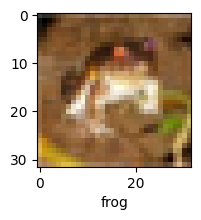

In [67]:
plot_sample(X_train, y_train, 0)

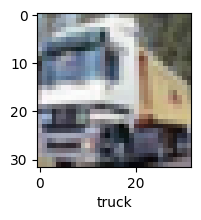

In [69]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [30]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Anaconda 3\envs\tf2\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 119ms/step - accuracy: 0.2811 - loss: 2.1962
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.3936 - loss: 1.6882
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 119ms/step - accuracy: 0.4252 - loss: 1.6087
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 119ms/step - accuracy: 0.4446 - loss: 1.5515
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 121ms/step - accuracy: 0.4615 - loss: 1.5041


**At the end of 5 epochs, accuracy is at around 46%**

In [98]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.65      0.52      1000
           1       0.56      0.61      0.58      1000
           2       0.36      0.26      0.30      1000
           3       0.34      0.28      0.31      1000
           4       0.40      0.45      0.42      1000
           5       0.54      0.18      0.27      1000
           6       0.44      0.58      0.50      1000
           7       0.58      0.36      0.44      1000
           8       0.49      0.59      0.54      1000
           9       0.47      0.60      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.44     10000
weighted avg       0.46      0.46      0.44     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Anaconda 3\envs\tf2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [37]:
#cnn.fit(X_train, y_train, epochs=10)

batch_size = 100
max_epochs = 10

# fit the model
cnn.fit(X_train,
        y_train,
        batch_size=batch_size,
        epochs=max_epochs,
        )  


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.2987 - loss: 1.8849
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5263 - loss: 1.3325
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5849 - loss: 1.1775
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6261 - loss: 1.0722
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6535 - loss: 0.9917
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.6765 - loss: 0.9326
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.6896 - loss: 0.8918
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7069 - loss: 0.8407
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7195 - loss: 0.8071
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7328 - loss: 0.7691


**With CNN, at the end 5 epochs, accuracy is around 70% which is a significant improvement over ANN.
CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [39]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7027 - loss: 0.8767


[0.8781628012657166, 0.7044000029563904]

In [41]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4.21547070e-02, 1.30530372e-02, 4.45208605e-03, 7.32975960e-01,
        4.07101616e-04, 6.80574924e-02, 3.82202421e-03, 1.08391000e-03,
        1.22065879e-01, 1.19277565e-02],
       [1.42540345e-02, 5.47033250e-01, 1.79358685e-05, 1.22419842e-05,
        1.11865374e-05, 8.19166587e-07, 6.76588888e-06, 1.65284803e-07,
        4.37328458e-01, 1.33515603e-03],
       [1.52641863e-01, 3.05111170e-01, 3.51751130e-03, 8.50352552e-03,
        1.02980051e-03, 9.74761089e-04, 3.84409796e-04, 1.39378896e-03,
        4.06791300e-01, 1.19651824e-01],
       [4.46200907e-01, 7.03427056e-03, 1.76165458e-02, 4.55891155e-03,
        3.54670896e-03, 8.92004828e-05, 9.28746071e-04, 4.65610756e-05,
        5.19642353e-01, 3.35848687e-04],
       [2.93546938e-04, 5.53385122e-04, 8.21636245e-03, 3.85853909e-02,
        1.74642980e-01, 7.05450820e-03, 7.67758191e-01, 1.51342319e-04,
        2.62290565e-03, 1.21404781e-04]], dtype=float32)

In [53]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[np.int64(3),
 np.int64(1),
 np.int64(8),
 np.int64(8),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

In [55]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

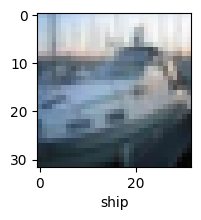

In [59]:
plot_sample(X_test, y_test,2)

In [61]:
classes[y_classes[2]]

'ship'

'frog'

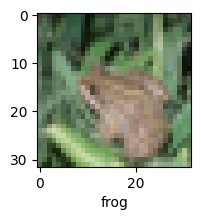

In [65]:
plot_sample(X_test, y_test,4)
classes[y_classes[4]]